In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras import layers
from keras.layers.core import Dense, Dropout, Activation
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from keras import regularizers
from keras.layers.normalization import BatchNormalization
from keras import optimizers

df_train = pd.read_csv('train-v3.csv')
df_vad = pd.read_csv('valid-v3.csv')
df_test = pd.read_csv('test-v3.csv')
# df_pre = pd.concat([df_train, df_vad], axis=0, sort=True)

df_train_Y = df_train['price']
df_train.drop(['price'], axis=1, inplace=True)
df_vad_Y = df_vad['price']
df_vad.drop(['price'], axis=1, inplace=True)

In [10]:
def featureHandling(df_data):
    df_data.drop(['id'], axis=1, inplace=True)
    
    categorical = ['zipcode','waterfront','view','condition']
    for var in categorical:
        df_data = pd.concat([df_data, pd.get_dummies(df_data[var], prefix=var)], axis=1)
        del df_data[var]
    
    label = ['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15','yr_built',
             'sale_month','sale_day','bathrooms','bedrooms','floors','grade','yr_renovated','sqft_living',
             'sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15','yr_built','sale_month',
             'sale_day','bathrooms','bedrooms','floors','grade','lat','long']
    normalize_items = df_data[label].values
    normalized_items = preprocessing.scale(normalize_items, with_mean=True,with_std=True,copy=True)
    i = 0 
    for var in label:
        df_data[var] = normalized_items[:,i]
        i = i + 1
        
    return df_data    

In [11]:
train = featureHandling(df_train).to_numpy()
val = featureHandling(df_vad).to_numpy()
test = featureHandling(df_test).to_numpy()

In [12]:
train.shape

(12967, 99)

In [61]:
def build_Model(x_size, y_size):
    model = Sequential()
    model.add(Dense(units=8,input_dim=x_size.shape[1], kernel_initializer='normal'))
    model.add(Activation('relu'))
    model.add(Dense(units=150, kernel_initializer='normal'))
    model.add(Activation('relu'))
    model.add(Dense(units=128, kernel_initializer='normal'))
    model.add(Activation('relu'))
    model.add(Dense(units=150, kernel_initializer='normal'))
    model.add(Activation('relu'))
    model.add(Dense(units=128, kernel_initializer='normal'))
    model.add(Activation('relu'))
    model.add(Dense(units=128, kernel_initializer='normal'))
    model.add(Activation('relu'))

    model.add(Dense(units=8, kernel_initializer='normal'))
    model.add(Activation('relu'))
    model.add(Dense(units=y_size, kernel_initializer='normal'))
    model.add(Activation('relu'))
    
    model.compile(
        loss='MAE',
        optimizer='adam',
        metrics=['mae'])
    return(model)

model = build_Model(train, 1)

epochs = 300
batch_size = 128

keras_callbacks = [
    EarlyStopping(monitor='val_mae', patience=20, verbose=0)
]

model_history = model.fit(train, df_train_Y,
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True,
    verbose=2, 
    validation_data=(val, df_vad_Y),
    callbacks=keras_callbacks,
                   )

Train on 12967 samples, validate on 2161 samples
Epoch 1/300
 - 2s - loss: 423175.2851 - mae: 423175.3125 - val_loss: 211566.4498 - val_mae: 211566.4531
Epoch 2/300


/Users/joe3813846/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_mean_absolute_error` which is not available. Available metrics are: val_loss,val_mae,loss,mae
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


 - 1s - loss: 221087.0063 - mae: 221086.9844 - val_loss: 208773.8995 - val_mae: 208773.8906
Epoch 3/300
 - 1s - loss: 220087.4089 - mae: 220087.4062 - val_loss: 208526.8249 - val_mae: 208526.8125
Epoch 4/300
 - 1s - loss: 219083.4124 - mae: 219083.4531 - val_loss: 206580.5793 - val_mae: 206580.5781
Epoch 5/300
 - 1s - loss: 217929.8841 - mae: 217929.8750 - val_loss: 205524.7741 - val_mae: 205524.7656
Epoch 6/300
 - 1s - loss: 216839.6096 - mae: 216839.5781 - val_loss: 205053.4406 - val_mae: 205053.4531
Epoch 7/300
 - 1s - loss: 215076.7974 - mae: 215076.7188 - val_loss: 201578.9134 - val_mae: 201578.9219
Epoch 8/300
 - 1s - loss: 211048.1333 - mae: 211048.1562 - val_loss: 196558.8819 - val_mae: 196558.8906
Epoch 9/300
 - 1s - loss: 200010.6362 - mae: 200010.6250 - val_loss: 174105.4476 - val_mae: 174105.4688
Epoch 10/300
 - 1s - loss: 152876.7289 - mae: 152876.7031 - val_loss: 137743.1799 - val_mae: 137743.1562
Epoch 11/300
 - 1s - loss: 126530.1745 - mae: 126530.1875 - val_loss: 11514

Epoch 83/300
 - 1s - loss: 74525.3951 - mae: 74525.3984 - val_loss: 77663.4601 - val_mae: 77663.4688
Epoch 84/300
 - 1s - loss: 73321.7328 - mae: 73321.7500 - val_loss: 72943.7270 - val_mae: 72943.7344
Epoch 85/300
 - 1s - loss: 74289.0935 - mae: 74289.1016 - val_loss: 73929.0718 - val_mae: 73929.0781
Epoch 86/300
 - 1s - loss: 74743.3780 - mae: 74743.3750 - val_loss: 75682.3455 - val_mae: 75682.3516
Epoch 87/300
 - 1s - loss: 74181.0539 - mae: 74181.0625 - val_loss: 70924.2546 - val_mae: 70924.2500
Epoch 88/300
 - 1s - loss: 73057.2220 - mae: 73057.2500 - val_loss: 70266.3114 - val_mae: 70266.3125
Epoch 89/300
 - 1s - loss: 73736.1560 - mae: 73736.1406 - val_loss: 75941.7146 - val_mae: 75941.7266
Epoch 90/300
 - 1s - loss: 74872.3045 - mae: 74872.3125 - val_loss: 70778.9736 - val_mae: 70778.9766
Epoch 91/300
 - 1s - loss: 73114.5107 - mae: 73114.5000 - val_loss: 71617.0490 - val_mae: 71617.0469
Epoch 92/300
 - 1s - loss: 72806.4537 - mae: 72806.4609 - val_loss: 71693.5930 - val_mae: 7

Epoch 164/300
 - 1s - loss: 72879.2145 - mae: 72879.2109 - val_loss: 79930.9521 - val_mae: 79930.9531
Epoch 165/300
 - 1s - loss: 71880.4523 - mae: 71880.4531 - val_loss: 70472.6797 - val_mae: 70472.6875
Epoch 166/300
 - 1s - loss: 73461.9593 - mae: 73461.9531 - val_loss: 71978.5456 - val_mae: 71978.5469
Epoch 167/300
 - 1s - loss: 73926.9751 - mae: 73926.9922 - val_loss: 70354.4929 - val_mae: 70354.4766
Epoch 168/300
 - 1s - loss: 73040.1726 - mae: 73040.1797 - val_loss: 72740.6009 - val_mae: 72740.6016
Epoch 169/300
 - 1s - loss: 72732.6957 - mae: 72732.6797 - val_loss: 78009.0354 - val_mae: 78009.0391
Epoch 170/300
 - 1s - loss: 72507.6162 - mae: 72507.6094 - val_loss: 69594.9827 - val_mae: 69594.9844
Epoch 171/300
 - 1s - loss: 73737.3067 - mae: 73737.3125 - val_loss: 71599.0264 - val_mae: 71599.0312
Epoch 172/300
 - 1s - loss: 71670.9698 - mae: 71670.9531 - val_loss: 69887.7537 - val_mae: 69887.7578
Epoch 173/300
 - 1s - loss: 72084.1287 - mae: 72084.1328 - val_loss: 70297.4798 - 

Epoch 245/300
 - 1s - loss: 72136.7180 - mae: 72136.7031 - val_loss: 71236.8519 - val_mae: 71236.8516
Epoch 246/300
 - 1s - loss: 72687.3491 - mae: 72687.3438 - val_loss: 69628.3801 - val_mae: 69628.3750
Epoch 247/300
 - 1s - loss: 72654.5019 - mae: 72654.4922 - val_loss: 73412.6528 - val_mae: 73412.6484
Epoch 248/300
 - 1s - loss: 71456.5981 - mae: 71456.5859 - val_loss: 73202.2550 - val_mae: 73202.2578
Epoch 249/300
 - 1s - loss: 74308.2941 - mae: 74308.2812 - val_loss: 74737.5488 - val_mae: 74737.5469
Epoch 250/300
 - 1s - loss: 73281.3567 - mae: 73281.3672 - val_loss: 70634.2654 - val_mae: 70634.2656
Epoch 251/300
 - 1s - loss: 72606.4710 - mae: 72606.4688 - val_loss: 70865.7043 - val_mae: 70865.7031
Epoch 252/300
 - 1s - loss: 71452.3797 - mae: 71452.3906 - val_loss: 70467.0118 - val_mae: 70467.0078
Epoch 253/300
 - 1s - loss: 72149.5040 - mae: 72149.5000 - val_loss: 70919.8908 - val_mae: 70919.8906
Epoch 254/300
 - 1s - loss: 72255.5265 - mae: 72255.5469 - val_loss: 70376.1467 - 

In [62]:
def rmsle(y, y_pred):
    return np.sqrt(mean_absolute_error(y, y_pred))

train_predict = model.predict(train)
print(rmsle(df_train_Y, train_predict))

264.62393900136937


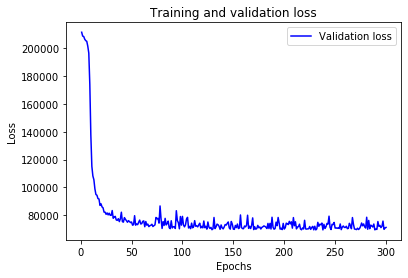

In [63]:
history_dict = model_history.history
# loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(val_loss_values)+1)
# plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()




In [64]:
test_predict = model.predict(test)
submissions = pd.DataFrame({"id": list(range(1, len(test_predict)+1)),
                           "price": test_predict[:,0]})
submissions.to_csv("submissions_DNN.csv", index = False, header = True)
